<a href="https://colab.research.google.com/github/cherg0607yl-coder/Credit-Card-Default---Machine-Learning-Classification-/blob/main/credit_card_default_classfication_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
# load the data into a pandas dataframe

data_path = '/content/drive/My Drive/Copy of credit_card_default.csv'
df = pd.read_csv(data_path)

# preview data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   GENDER     30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Cleaning

### Client Personal Information
Below we print the numeric distribution of the client personal information features. The LIMIT_BAL, GENDER, and AGE attributes seem to be consistent with the description in dataset dictionary, while MARRIAGE and EDUCATION have some undocumented categories. EDUCATION ranges from 0 to 6, while MARRIAGE starts at category 0.

In [ ]:
df[['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500
std,129747.661567,0.489129,0.790349,0.521970,9.217904
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [ ]:
print(df['GENDER'].value_counts().sort_index())
print(df['EDUCATION'].value_counts().sort_index())
print(df['MARRIAGE'].value_counts().sort_index())

GENDER
1    11888
2    18112
Name: count, dtype: int64
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64


### Problem 1: Uncategorized elements in MARRIAGE
Marriage should only contain three categories: 1 = married, 2 = single, 3 = other.

But this dataset has 54 data identified as 0.

**To solve this, we map the 0 into "other" category.**

In [ ]:
# Identify the numeric distribution of marriage

df['MARRIAGE'].value_counts().sort_index()

,count
MARRIAGE,
0,54
1,13659
2,15964
3,323


In [ ]:
# Replace 0 with 3

df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df['MARRIAGE'].value_counts().sort_index()

,count
MARRIAGE,
1,13659
2,15964
3,377


### Problem 2: Uncategorized elements in EDUCATION
Education should only contain: 1 = terminal degree, 2 = some graduate school, 3  = bachelor’s degree, 4 = some college, 5 = high school graduate

But this dataset contains unidentified 0 and 6.

**To solve this, considering the anomalous entries are relative few, we decide to remove them.**

In [ ]:
# Identify the numeric distribution of EDUCATION

df['EDUCATION'].value_counts().sort_index()

,count
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


In [ ]:
# remove uncategorized information in EDUCATION

print(f"Dataset size before:\t{df.shape[0]}")

df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==6].index)

print(f"Dataset size after:\t{df.shape[0]}")

Dataset size before:	30000
Dataset size after:	29935


In [ ]:
# Double-check the numeric distribution of EDUCATION
df['EDUCATION'].value_counts().sort_index()

,count
EDUCATION,
1,10585
2,14030
3,4917
4,123
5,280


### History of Past Payments
Below we print the numeric distribution of the history of past payments. The columns PAY_n range from -2 (undocumented) to 8, therefore, we believe they need to be cleaned to match the dataset dictionary.

### Problem 3
PAY_N should only contains: -1 = paid on time, 1 = 1 month late, 2 = 2 months late, etc, so it should only represent -1,1,2,3,4,5,6,7,8

But it also has 0 and -2.

# **0** = paid on time, map -1 and -2 into 0 ???

In [ ]:
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
  print(df[col].value_counts().sort_index())

PAY_1
-2     2750
-1     5675
 0    14700
 1     3685
 2     2662
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64
PAY_2
-2     3772
-1     6036
 0    15691
 1       28
 2     3925
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64
PAY_3
-2     4074
-1     5924
 0    15726
 1        4
 2     3817
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64
PAY_4
-2     4336
-1     5672
 0    16420
 1        2
 2     3156
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: count, dtype: int64
PAY_5
-2     4535
-1     5520
 0    16912
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: count, dtype: int64
PAY_6
-2     4878
-1     5722
 0    16256
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: count, dtype: int64


In [ ]:
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    df[col] = df[col].replace([-1, -2], 0)
    print(f"Value counts for {col} after replacement:\n{df[col].value_counts()}\n")

Value counts for PAY_1 after replacement:
PAY_1
0    23125
1     3685
2     2662
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64

Value counts for PAY_2 after replacement:
PAY_2
0    25499
2     3925
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: count, dtype: int64

Value counts for PAY_3 after replacement:
PAY_3
0    25724
2     3817
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: count, dtype: int64

Value counts for PAY_4 after replacement:
PAY_4
0    26428
2     3156
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: count, dtype: int64

Value counts for PAY_5 after replacement:
PAY_5
0    26967
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: count, dtype: int64

Value counts for PAY_6 after replacement:
PAY_6
0    26856
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name:

# Preprocess Data for building classification tree model


*   Drop unnecessary variables
*   Convert some variables into categorial ones



In [ ]:
# drop unnecessary columns
df.drop(columns='ID', inplace=True)

# Convert variable from integer to categorical
df['DEFAULT'] = df['DEFAULT'].astype('category')
df['GENDER'] = df['GENDER'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 29935 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  29935 non-null  int64   
 1   GENDER     29935 non-null  category
 2   EDUCATION  29935 non-null  category
 3   MARRIAGE   29935 non-null  category
 4   AGE        29935 non-null  int64   
 5   PAY_1      29935 non-null  int64   
 6   PAY_2      29935 non-null  int64   
 7   PAY_3      29935 non-null  int64   
 8   PAY_4      29935 non-null  int64   
 9   PAY_5      29935 non-null  int64   
 10  PAY_6      29935 non-null  int64   
 11  BILL_AMT1  29935 non-null  int64   
 12  BILL_AMT2  29935 non-null  int64   
 13  BILL_AMT3  29935 non-null  int64   
 14  BILL_AMT4  29935 non-null  int64   
 15  BILL_AMT5  29935 non-null  int64   
 16  BILL_AMT6  29935 non-null  int64   
 17  PAY_AMT1   29935 non-null  int64   
 18  PAY_AMT2   29935 non-null  int64   
 19  PAY_AMT3   29935 non-null  int

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Check Whether Data is Imbalanced or Not

The dataset is kind of imbalanced, as the not default is way more than default, which could cause the model to be more easily identify not default than default.

Not Default: 77.88%

Default: 22.12%

**I will probably continue building the model taught in class, but we can figure out another way to deal with the imbalance later.**

DEFAULT
0    0.778587
1    0.221413
Name: proportion, dtype: float64


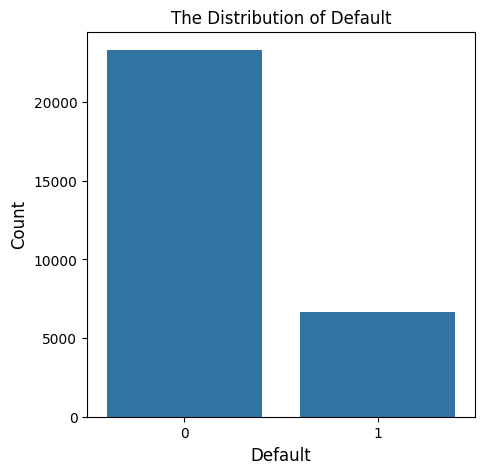

In [ ]:
# Visualize the imbalance of Default (target variable)

default_number = df["DEFAULT"].value_counts()
print(df["DEFAULT"].value_counts(normalize=True))

plt.figure(figsize=(5,5))
sns.barplot(x=default_number.index, y=default_number.values)
plt.title('The Distribution of Default')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Default', fontsize=12)
plt.show()

# Split data into training and test sets

Before splitting

* Separate X and y variables into separate data frames
* Create dummy variables

In [ ]:
# split the data into training and testing sets
X = df.drop(['DEFAULT'], axis=1)

y = df['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20954 entries, 964 to 23701
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  20954 non-null  int64   
 1   GENDER     20954 non-null  category
 2   EDUCATION  20954 non-null  category
 3   MARRIAGE   20954 non-null  category
 4   AGE        20954 non-null  int64   
 5   PAY_1      20954 non-null  int64   
 6   PAY_2      20954 non-null  int64   
 7   PAY_3      20954 non-null  int64   
 8   PAY_4      20954 non-null  int64   
 9   PAY_5      20954 non-null  int64   
 10  PAY_6      20954 non-null  int64   
 11  BILL_AMT1  20954 non-null  int64   
 12  BILL_AMT2  20954 non-null  int64   
 13  BILL_AMT3  20954 non-null  int64   
 14  BILL_AMT4  20954 non-null  int64   
 15  BILL_AMT5  20954 non-null  int64   
 16  BILL_AMT6  20954 non-null  int64   
 17  PAY_AMT1   20954 non-null  int64   
 18  PAY_AMT2   20954 non-null  int64   
 19  PAY_AMT3   20954 non-null  i

# Decision Tree
**Since the recall is too low in the previous model, I added another parameter "Class_weight", which can put more weight on predicting the actual default scenario.**

Banks care more about recall than precision.

Because:
✔ High recall → you catch more people likely to default
You avoid approving risky loans
You prevent big financial losses
❌ Low precision → some people falsely flagged as risky
But banks can handle that:
They can ask for more documents
Require higher interest rates
Do additional checks

So the cost of a false positive (FP) is much smaller than the cost of a false negative (FN).

In credit risk:
→ Missing a defaulter (FN) is far worse than
→ Calling someone risky who is actually safe (FP).

In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001, class_weight='balanced')

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)


DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=25,
                       min_samples_leaf=10)

# Visualize Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

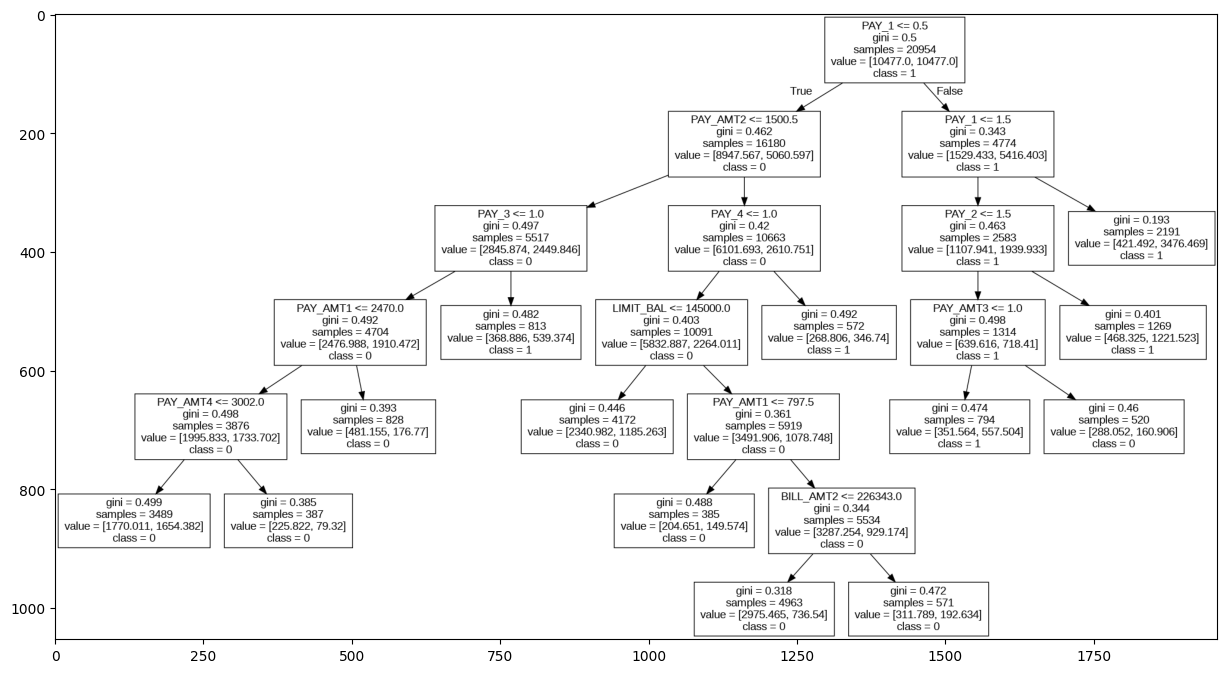

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (15, 10))
plt.imshow(img)

# Make Predictions on the training and test data

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

# Assess Model on Training and Test data


*   No overfitting
*   However, precision and recall are kinda low.


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7689
Precision: 0.4806
Recall.  : 0.5862

 -- test set -- 
Accuracy : 0.7691
Precision: 0.4858
Recall.  : 0.5895


# Generate a confusion matrix for the training and test data

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[13402  1913]
 [ 2929  2710]]
[[5725  823]
 [1251 1182]]


# Generate ROC curves for training and test data

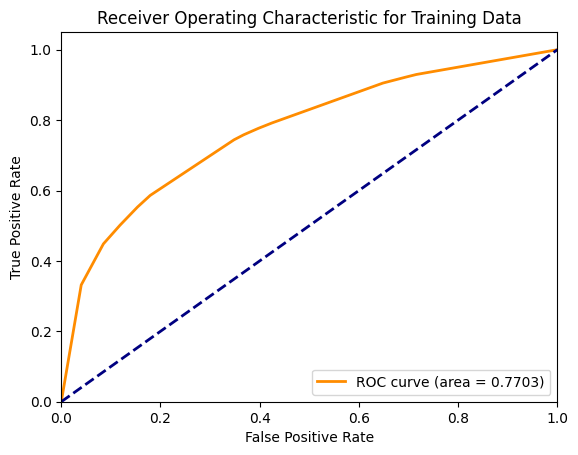

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

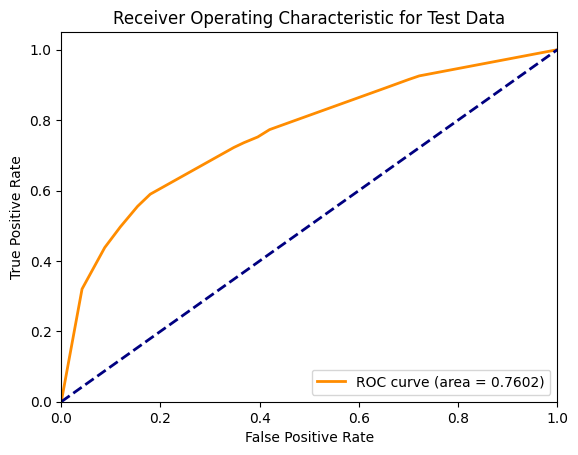

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


# Print feature importance for the tree

    importance    feature
5     0.765162      PAY_1
18    0.072346   PAY_AMT2
8     0.038084      PAY_4
17    0.028822   PAY_AMT1
6     0.023405      PAY_2
0     0.016502  LIMIT_BAL
19    0.016149   PAY_AMT3
7     0.015621      PAY_3
12    0.012365  BILL_AMT2
20    0.011543   PAY_AMT4
2     0.000000  EDUCATION
3     0.000000   MARRIAGE
4     0.000000        AGE
1     0.000000     GENDER
9     0.000000      PAY_5
14    0.000000  BILL_AMT4
13    0.000000  BILL_AMT3
11    0.000000  BILL_AMT1
10    0.000000      PAY_6
15    0.000000  BILL_AMT5
16    0.000000  BILL_AMT6
21    0.000000   PAY_AMT5
22    0.000000   PAY_AMT6


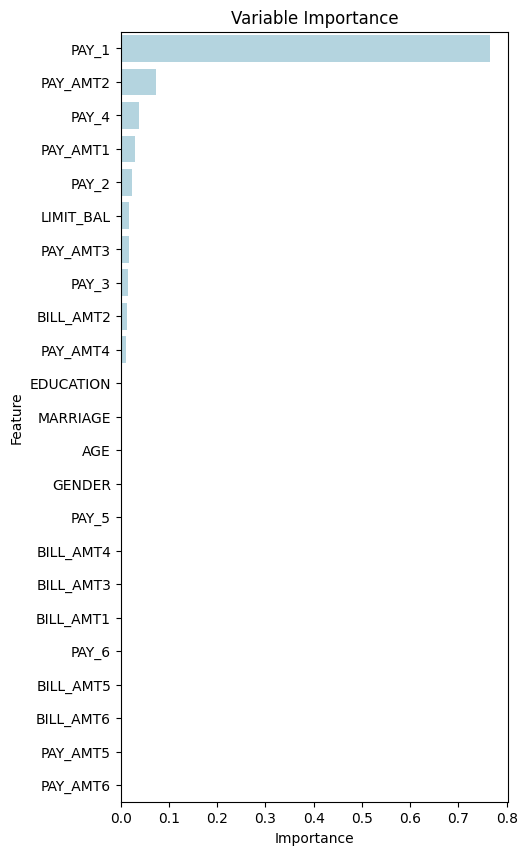

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()